

----------------------------------MENU PRINCIPAL------------------------------------------------
1.Actualización de datos
2.Visualización de datos
Ingrese una Opción (1 o 2). Presiona cualquier otra tecla para salir: 2




---------------------------------Visualización de Datos-----------------------------------------
1.Resumen
2.Gráfico de Ticker
Ingrese una Opción (1 o 2). Presiona cualquier otra tecla para volver al Menu Principal: 2


Ingrese el Ticker a graficar: meli


El ticker ingresado no posee datos guardados




---------------------------------Visualización de Datos-----------------------------------------
1.Resumen
2.Gráfico de Ticker
Ingrese una Opción (1 o 2). Presiona cualquier otra tecla para volver al Menu Principal: 2


Ingrese el Ticker a graficar: meli


El ticker ingresado no posee datos guardados




---------------------------------Visualización de Datos-----------------------------------------
1.Resumen
2.Gráfico de Ticker
Ingrese una Opción (1 o 2). Presiona

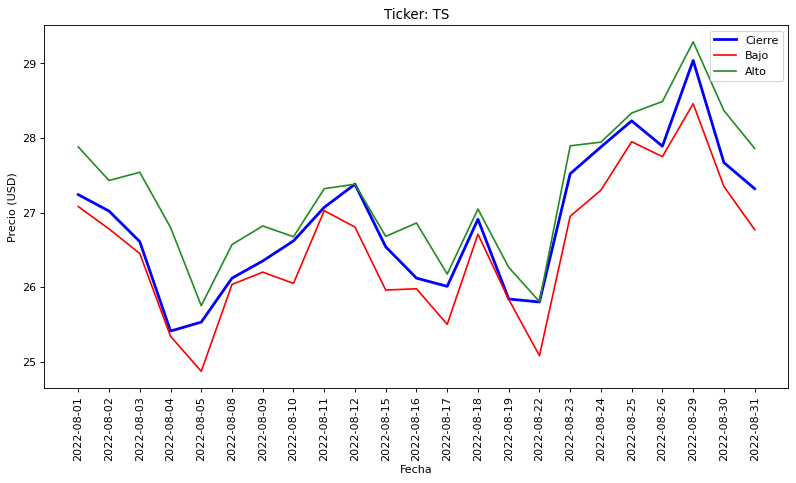



¿Desea visualizar parámetros técnicos del ticker seleccionado?
1. Deseo visualizarlos
2 (O cualquier otra tecla). No deseo visualizarlos
Su respuesta: 1




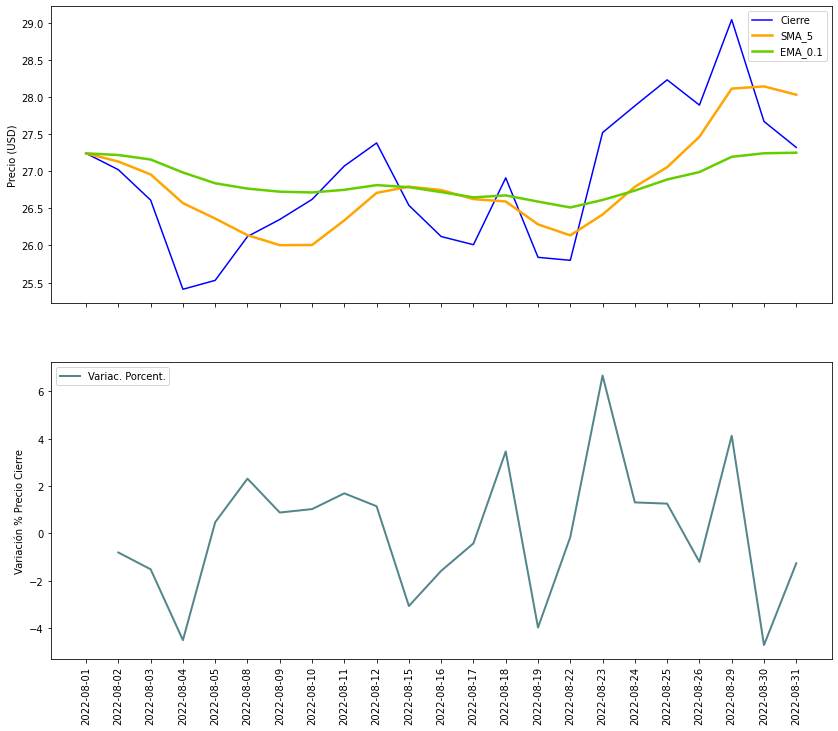







---------------------------------Visualización de Datos-----------------------------------------
1.Resumen
2.Gráfico de Ticker
Ingrese una Opción (1 o 2). Presiona cualquier otra tecla para volver al Menu Principal: s




----------------------------------MENU PRINCIPAL------------------------------------------------
1.Actualización de datos
2.Visualización de datos
Ingrese una Opción (1 o 2). Presiona cualquier otra tecla para salir: 




In [2]:
import requests
from datetime import datetime, timedelta
from time import sleep 
from dateutil.parser import parse
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#_______________CLASES_________________________

class Ticker:

    # Inicializador
    def __init__(self, nombre_ticker, Aperturas=[], Cierres=[], Fechas=[], Bajos=[], Altos=[], Volumenes=[]):
        self.Nombre_Ticker = nombre_ticker
        self.Aperturas=[x for x in Aperturas]
        self.Cierres=[x for x in Cierres]
        self.Bajos=[x for x in Bajos]
        self.Altos=[x for x in Altos]
        self.Fechas = [x for x in Fechas]
        self.Volumenes = [x for x in Volumenes]

    # Métodos
    def agregar_datos(self, fecha, apertura, cierre, bajo, alto, volumen):
        (self.Fechas).append(fecha)
        (self.Aperturas).append(apertura)
        (self.Cierres).append(cierre)
        (self.Bajos).append(bajo)
        (self.Altos).append(alto)
        (self.Volumenes).append(volumen)
        return 

#____________________FUNCIONES____________________________
def crear_tabla_db():
    con = sqlite3.connect('TICKERS.db')
    cursor = con.cursor()
    res = cursor.execute("""
    CREATE TABLE IF NOT EXISTS tickers (
    Ticker STRING,
    Fecha STRING,
    Apertura FLOAT,
    Cierre FLOAT,
    Bajo FLOAT,
    Alto FLOAT,
    Volumen INTEGER);
    """)
    con.close()

    con = sqlite3.connect('TICKERS.db')
    cursor = con.cursor()
    res = cursor.execute("""
    CREATE TABLE IF NOT EXISTS resumen (
    Ticker STRING,
    Fecha_Inicio STRING,
    Fecha_Fin STRING);
    """)
    con.close()

    con = sqlite3.connect('TICKERS.db')
    cursor = con.cursor()
    res = cursor.execute("""
    CREATE TABLE IF NOT EXISTS final (
    Ticker STRING,
    Fecha_Inicio STRING,
    Fecha_Fin STRING);
    """)
    con.close()
    return


def guardar_datos_db():
    con = sqlite3.connect('TICKERS.db')
    cursor = con.cursor()
    for l in range(len(Tiker_obtenido.Fechas)):

        if (len(Tiker_obtenido.Fechas))==1:
            ayuda=Tiker_obtenido.Fechas[l]
            data=(Tiker_obtenido.Nombre_Ticker, ayuda, Tiker_obtenido.Fechas[l])
            cursor.execute("INSERT INTO resumen (Ticker, Fecha_Inicio, Fecha_Fin) VALUES(?, ?, ?)", data)
            con.commit()

        if l==0:
            ayuda=Tiker_obtenido.Fechas[l]
#            data=(Tiker_obtenido.Nombre_Ticker, Tiker_obtenido.Fechas[l])
#            cursor.execute("INSERT INTO resumen (Ticker, Fecha_Inicio) VALUES(?, ?)", data)
#            con.commit()

        elif l==(len(Tiker_obtenido.Fechas)-1):
            data=(Tiker_obtenido.Nombre_Ticker, ayuda, Tiker_obtenido.Fechas[l])
            cursor.execute("INSERT INTO resumen (Ticker, Fecha_Inicio, Fecha_Fin) VALUES(?, ?, ?)", data)
            con.commit()
       
        data=(Tiker_obtenido.Nombre_Ticker, Tiker_obtenido.Fechas[l], Tiker_obtenido.Aperturas[l], Tiker_obtenido.Cierres[l], Tiker_obtenido.Bajos[l], Tiker_obtenido.Altos[l], Tiker_obtenido.Volumenes[l])
        cursor.execute("INSERT INTO tickers (Ticker, Fecha, Apertura, Cierre, Bajo, Alto, Volumen) VALUES(?, ?, ?, ?, ?, ?, ?)", data)
        con.commit()
    return

def depurar_Resumen():
    con = sqlite3.connect('TICKERS.db')
    cursor = con.cursor()
    res2=cursor.execute("""
    SELECT resumen.Ticker, resumen.Fecha_Inicio, resumen.Fecha_Fin
    FROM resumen
    """)

    listado_tickers=[]

    for row in res2:
        listado_tickers.append(row[0])  #guardo ticker

    #elimino tickers repetidos
    resum_unic_tickers=[]
    for h in listado_tickers:
        if h not in resum_unic_tickers:
            resum_unic_tickers.append(h)

    ticresum=[]
    fecha_ini=[]
    fecha_fin=[]
    con = sqlite3.connect('TICKERS.db')
    cursor = con.cursor()
    res3=cursor.execute("""
    SELECT resumen.Ticker, resumen.Fecha_Inicio, resumen.Fecha_Fin
    FROM resumen
    """)

    
    ticresum_por_ticker=[]
    fechaini_por_ticker=[]
    fechafin_por_ticker=[]
    for p in resum_unic_tickers:
        res4=cursor.execute(f"""
        SELECT resumen.Ticker, resumen.Fecha_Inicio, resumen.Fecha_Fin
        FROM resumen
        WHERE resumen.Ticker='{p}';
        """)

        for row in res4:
            fit = parse(row[1])
            fi = datetime.date(fit) 
            fientt=int(fi.strftime("%Y%m%d"))

            fft = parse(row[2])
            ff = datetime.date(fft)
            ffentt=int(ff.strftime("%Y%m%d"))

            ticresum.append(row[0])
            fecha_ini.append(fientt)    #guardo fecha de inicio 
            fecha_fin.append(ffentt)    #guardo fecha de fin

        ticresum_por_ticker.append(ticresum)
        fechaini_por_ticker.append(fecha_ini)
        fechafin_por_ticker.append(fecha_fin)

        fecha_ini=[]
        fecha_fin=[]
        ticresum=[]

    con = sqlite3.connect('TICKERS.db')
    cursor = con.cursor()

    res5=cursor.execute("""
    SELECT resumen.Ticker, resumen.Fecha_Inicio, resumen.Fecha_Fin
    FROM resumen
    """)
    fidb=[]
    ffdb=[]
    tic=[]

    for p in resum_unic_tickers:
        for row in res5:
            tic.append(row[0])
            fidb.append(row[1])
            ffdb.append(row[2])

    for f in range((len(fidb))):
        for e in range(len(fechaini_por_ticker)):
            fit = parse(fidb[f])
            fi = datetime.date(fit) 
            fient=int(fi.strftime("%Y%m%d"))

            fft = parse(ffdb[f])
            ff = datetime.date(fft)
            ffent=int(ff.strftime("%Y%m%d"))
                
            for fe in range(len(fechaini_por_ticker[e])):
                if ticresum_por_ticker[e][fe]==tic[f] and fient>fechaini_por_ticker[e][fe] and fient<fechafin_por_ticker[e][fe] and ffent>fechaini_por_ticker[e][fe] and ffent<fechafin_por_ticker[e][fe]:
                    fientsrt=str(fient)
                    ffentstr=str(ffent)

                    fii = datetime.strptime(fientsrt, '%Y%m%d')
                    fii2 = datetime.date(fii)

                    fff = datetime.strptime(ffentstr, '%Y%m%d')
                    fff2 = datetime.date(fff)

                    data=(tic[f], fii2, fff2)
                    cursor.execute("INSERT INTO final (Ticker, Fecha_inicio, Fecha_Fin) VALUES(?, ?, ?)", data)
                    con.commit()



    con = sqlite3.connect('TICKERS.db')
    cursor = con.cursor()
    res2=cursor.execute("""
    SELECT final.Ticker, final.Fecha_Inicio, final.Fecha_Fin
    FROM final
    """)


    Ticker_def=[]
    Fechaini_def=[]
    Fechafin_def=[]
    for row in res2:                  #guardo en lista datos a eliminar desde tabla "final"
        Ticker_def.append(row[0])   
        Fechaini_def.append(row[1])   
        Fechafin_def.append(row[2])
  

    con = sqlite3.connect('TICKERS.db')
    cursor = con.cursor()
    res3=cursor.execute("""
    SELECT resumen.Ticker, resumen.Fecha_Inicio, resumen.Fecha_Fin
    FROM resumen
    """)     
    for row in res3:                   #guardo en lista datos de la tabla "resumen"
        Ticker_def.append(row[0])   
        Fechaini_def.append(row[1])   
        Fechafin_def.append(row[2])   

    datos3={
        "Ticker": Ticker_def,
        "Fecha_Inicio": Fechaini_def,
        "Fecha_Fin": Fechafin_def
        }


    con = sqlite3.connect('TICKERS.db')
    cursor = con.cursor()
    res2=cursor.execute("""
    DELETE FROM final;
    """)
    con.commit()


    Tickers_Total_total=pd.DataFrame(data=datos3)
    Tickers_Total_total=Tickers_Total_total.drop_duplicates(keep=False)

    Tickers_Total_total = Tickers_Total_total.sort_values(['Ticker', 'Fecha_Inicio'],ascending=True)
    return Tickers_Total_total


def existe_ticker(nombre_ticker):
        json_file=requests.get("https://api.polygon.io/v3/reference/tickers/"+nombre_ticker+"?apiKey=koTdrPqepxbon7yPbhPEejDv23UHe2Kw")
        json_obj = json_file.json()

        if(json_obj['status']=='NOT_FOUND'):      #si el ticker ingresado no existe
            print('El ticker ingresado no existe dentro del API de "Polygon.io"\n')
            return False
                
        else:                                     #si el ticker ingresado existe
            print("El ticker ingresado corresponde a la empresa: ", json_obj['results']['name']+"\n")
            return True

def param_tec(datos, grafico_ticker):
    Total_Tickers=pd.DataFrame(data=datos)
    Total_Tickers=Total_Tickers.set_index("Ticker")
    Mostrar=Total_Tickers.loc[grafico_ticker,:]
    Mostrar = Mostrar.sort_values('Fecha',ascending=True)
    x=Mostrar["Fecha"]
    y1=Mostrar["Cierre"]
    
    print("\n")
    print("¿Desea visualizar parámetros técnicos del ticker seleccionado?")
    print("1. Deseo visualizarlos")
    print("2 (O cualquier otra tecla). No deseo visualizarlos")
    param= input("Su respuesta: ")
    print("\n")

    y5= Mostrar['SMA_5']=y1.rolling(5, min_periods=1).mean()
    y7=Mostrar['EMA_0.1'] = y1.ewm(alpha=0.1, adjust=False).mean()
#    y8=Mostrar['EMA_0.3'] = y1.ewm(alpha=0.3, adjust=False).mean()


    if param=="1":
        fig, axs = plt.subplots(2, sharex=True)
#        fig.suptitle("Ticker: "+grafico_ticker)
        plt.xticks(rotation=90)
        fig.set_figheight(12)
        fig.set_figwidth(14)
        axs[1].plot(x, y1.pct_change()*100, color="#53868B", linewidth=2, label="Variac. Porcent.")
        axs[1].set_ylabel('Variación % Precio Cierre')
        axs[1].legend(loc='upper left')
        axs[0].plot(x, y1, color="blue", linewidth=1.5, label="Cierre")
        axs[0].plot(x, y5, color="orange", linewidth=2.5, label="SMA_5")
        axs[0].plot(x, y7, color="#66CD00", linewidth=2.5, label="EMA_0.1")
        axs[0].set_ylabel('Precio (USD)')
        axs[0].legend(loc='upper right')
        plt.show()
        print("\n")
        return
    else:
        None
        return

def imprimir_Menu_Ppal():
    print("\n")
    print("----------------------------------MENU PRINCIPAL------------------------------------------------")
    print("1.Actualización de datos")
    print("2.Visualización de datos")
    opcion1=input("Ingrese una Opción (1 o 2). Presiona cualquier otra tecla para salir: ")
    print("\n")
    return opcion1


def imprimir_Menu_Visualiz():
    print("\n")
    print("---------------------------------Visualización de Datos-----------------------------------------")
    print("1.Resumen")
    print("2.Gráfico de Ticker")
    opcion2=input("Ingrese una Opción (1 o 2). Presiona cualquier otra tecla para volver al Menu Principal: ")
    print("\n")
    return opcion2 


#________________________MAIN:PROGRAMA PRINCIPAL___________________________
crear_tabla_db()

opcion=imprimir_Menu_Ppal()     #se llama al Menú Principal para elejir las opciones

while opcion =="1" or opcion =="2":
    if opcion=="1":
        nombre_ticker=input("Ingrese ticker a pedir: ")
        print("\n")
        nombre_ticker=nombre_ticker.upper()

        existe=existe_ticker(nombre_ticker)

        if existe:
            #Hago un select que me traiga los datos ya existentes en la base de datos de un determinado ticker
            #si el ticker no existe no trae nada, lo agrega despues a la base de datos     
            con = sqlite3.connect('TICKERS.db')
            cursor = con.cursor()
            res=cursor.execute(f"""
            SELECT tickers.Ticker, tickers.Fecha, tickers.Apertura, 
            tickers.Cierre, tickers.Bajo, tickers.Alto, tickers.Volumen
            FROM tickers
            WHERE tickers.Ticker='{nombre_ticker}';
            """)

            while True:         #se ingresa una cadena de caracteres que no puede ser transformada en formato de fecha
                try:
                    fecha_inicio=input("Ingrese fecha de inicio (YYYY-MM-DD): ")
                    fecha_fin=input("Ingrese fecha de fin (YYYY-MM-DD): ")

                    dt1=parse(fecha_inicio)
                    dt2=parse(fecha_fin)
                    break
                except ValueError:
                    print("Oops! Una de las fechas ingresadas no es válida. Recuerde usar formato AAAA-MM-DD (AÑO-MES-DIA).Inténtelo nuevamente...\n")
          

            while len(fecha_inicio)<10 or len(fecha_fin)<10:        #se ingresan menos de 10 caracteres (YYYY-MM-DD)
                print("Oops! Una de las fechas ingresadas no es válida. Recuerde usar formato AAAA-MM-DD (AÑO-MES-DIA).Inténtelo nuevamente...\n")
                fecha_inicio=input("Ingrese fecha de inicio (YYYY-MM-DD): ")
                fecha_fin=input("Ingrese fecha de fin (YYYY-MM-DD): ")

            dt1=parse(fecha_inicio)
            dt2=parse(fecha_fin)
            dif=dt2-dt1
            dif=int(dif.days)   #obtengo cantidad de dias a pedir datos

            while dif<0:        #si la fecha de inicio es menor a la fecha final
                print("Oops! La fecha de inicio es mayor a la fecha de fin.Inténtelo nuevamente...\n")
                fecha_inicio=input("Ingrese fecha de inicio (YYYY-MM-DD): ")
                fecha_fin=input("Ingrese fecha de fin (YYYY-MM-DD): ")
                dt1=parse(fecha_inicio)
                dt2=parse(fecha_fin)
                dif=dt2-dt1
                dif=int(dif.days)   #obtengo cantidad de dias a pedir datos
            

            Tiker_obtenido=Ticker(nombre_ticker)    #guardo primero el nombre del ticker en la clase  
            raw=fecha_inicio #fecha inicio pedida

            dif+=1     

            dt = parse(raw)
            d = datetime.date(dt)
            fecha_sig=d
            j=0
            lista_fechas=[]
            for i in range(0,dif):     
                lista_fechas.append(fecha_sig)
                j+=1
                td = timedelta(j)
                fecha_sig = d + td

            fechas_db=[]
            lista_fechas_fin=[]
            for row in res:
                fechas_db.append(row[1])

            for i in lista_fechas:
                i=str(i)
                if i not in fechas_db:
                    lista_fechas_fin.append(i)

            cuenta=0
            for f in lista_fechas_fin:
                cuenta+=1
                fecha=str(f)
                json_file2=requests.get("https://api.polygon.io/v1/open-close/"+nombre_ticker+"/"+fecha+"?adjusted=true&apiKey=koTdrPqepxbon7yPbhPEejDv23UHe2Kw")
                json_obj2 = json_file2.json()
                print("Obteniendo datos de fecha "+fecha+"...")
                sleep(12)
     
                if json_obj2['status']=='NOT_FOUND':    #si en esa fecha no hubo stocks, no se agrega a la clase del Ticker
                    None                  
                else:                                       #si en esa fecha hubo stocks, guardo en la clase la fecha y el valor de cierre
                    dt_aux = parse(fecha)
                    d_aux = datetime.date(dt_aux)
                    Tiker_obtenido.agregar_datos(d_aux, json_obj2["open"],  json_obj2["close"], json_obj2["low"], json_obj2["high"], json_obj2["volume"])


            print("Guardando datos...")
            guardar_datos_db()
            con.close()
        
        opcion=imprimir_Menu_Ppal()         #si el ticker no existe, no pido datos, vuelvo al menu principal

    elif opcion=="2":
        datos = {}

        datos2 = {}

        con = sqlite3.connect('TICKERS.db')
        cursor = con.cursor()
        res=cursor.execute("""
        SELECT tickers.Ticker, tickers.Fecha, tickers.Apertura, 
        tickers.Cierre, tickers.Bajo, tickers.Alto, tickers.Volumen
        FROM tickers
        """)

        Tikers=[]
        Fechas=[]
        Aperturas=[]
        Cierres=[]
        Bajos=[]
        Altos=[]
        Volumenes=[]

        for row in res:
            Tikers.append(row[0])
            Fechas.append(row[1])
            Aperturas.append(row[2])
            Cierres.append(row[3])
            Bajos.append(row[4])
            Altos.append(row[5])
            Volumenes.append(row[5])

        datos={
            "Ticker": Tikers,
            "Fecha": Fechas,
            "Apertura": Aperturas,
            "Cierre": Cierres,
            "Bajo": Bajos,
            "Alto": Altos,
            "Volumen": Volumenes   
        }
        con.close()


        con = sqlite3.connect('TICKERS.db')
        cursor = con.cursor()
        res2=cursor.execute("""
        SELECT resumen.Ticker, resumen.Fecha_Inicio, resumen.Fecha_Fin
        FROM resumen
        """)

        Tikers2=[]
        Fecha_Inicio=[]
        Fecha_Fin=[]

        for row in res2:
            Tikers2.append(row[0])
            Fecha_Inicio.append(row[1])
            Fecha_Fin.append(row[2])

        datos2={
            "Ticker": Tikers2,
            "Fecha_Inicio": Fecha_Inicio,
            "Fecha_Fin": Fecha_Fin
        }

        con.close()

        Total_Tickers=pd.DataFrame(data=datos)
        Resumen_Tickers=pd.DataFrame(data=datos2)
#        Total_Tickers=Total_Tickers.set_index("Ticker")

        opcion2=imprimir_Menu_Visualiz()

        while opcion2 =="1" or opcion2 =="2":
            if opcion2=="1":
                #HASTA ACA SE PUEDE VER RESUMEN DE TICKERS SIN DEPURAR (AGREGAR A INFORME ESTA PARTE)
#                Resumen_Tickers = Resumen_Tickers.sort_values(['Ticker','Fecha_Inicio'], ascending=False)
#                print("Resumen sin depurar")
#                print(Resumen_Tickers)
#                print("\n")
#                print("Resumen depurado")

                Tickers_Total_total=depurar_Resumen()

                blankIndex=[''] * len(Tickers_Total_total)     #elimino el numero de fila (indice) para imprimir el dataframe
                Tickers_Total_total.index=blankIndex

                if Total_Tickers.empty:
                    print("La base de datos no posee datos aún")
                else:
                    print("Los tickers guardados en la base de datos son:\n")
                    print(Tickers_Total_total)

                opcion2=imprimir_Menu_Visualiz()    #Se vuelve a mostrar el Menú de Visualización




            elif opcion2=="2":
                Total_Tickers=pd.DataFrame(data=datos)
                #_____GRAFICO DE DATOS DE TICKER SELECCIONADO POR USUARIO_____
                grafico_ticker=input("Ingrese el Ticker a graficar: ")
                print("\n")
                grafico_ticker=grafico_ticker.upper()

                if Total_Tickers.empty: 
                    print("La base de datos no posee datos aún")

                elif grafico_ticker in Total_Tickers.values:
                    Total_Tickers=Total_Tickers.set_index("Ticker")
                    Mostrar=Total_Tickers.loc[grafico_ticker,:]
                    Mostrar = Mostrar.sort_values('Fecha',ascending=True)
                    x=Mostrar["Fecha"]
                    y1=Mostrar["Cierre"]
                    y2=Mostrar["Apertura"]
                    y3=Mostrar["Bajo"]
                    y4=Mostrar["Alto"]
               
                    plt.figure(figsize=(12, 6), dpi=80)
                    plt.plot(x, y1, color="blue", linewidth=2.5, label="Cierre")
                    plt.plot(x, y3, color="red", linewidth=1.5, label="Bajo")
                    plt.plot(x, y4, color="#228B22", linewidth=1.5, label="Alto")

                    plt.legend(loc='upper right')
                    plt.xticks(rotation=90)
                    plt.title("Ticker: "+grafico_ticker)
                    plt.xlabel('Fecha')
                    plt.ylabel('Precio (USD)')
                    plt.show()

                    param_tec(datos, grafico_ticker)     #llamo a esta función para visualizar parámetros técnicos del ticker

                else:                  
                    print("El ticker ingresado no posee datos guardados")


                print("\n")
                opcion2=imprimir_Menu_Visualiz()    #Se vuelve a mostrar el Menú de Visualización

        opcion=imprimir_Menu_Ppal()      #se llama el Menú Principal
